# Name - Bushra Rahman
## Data Science Internship
## Bharat Intern - Jan/2024

## Project No. 02 - Titanic Classification

### Importing required libraries

In [615]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Importing dataset

In [616]:
df = pd.read_csv("Titanic.csv")
test_df = pd.read_csv("test.csv")

In [617]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [618]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [619]:
df.shape

(891, 12)

In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [621]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

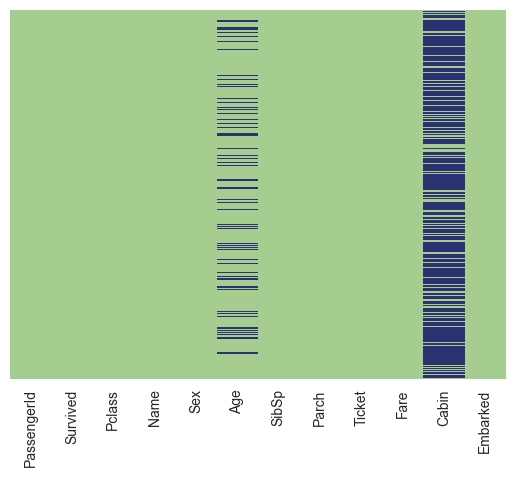

In [622]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='crest')

In [623]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

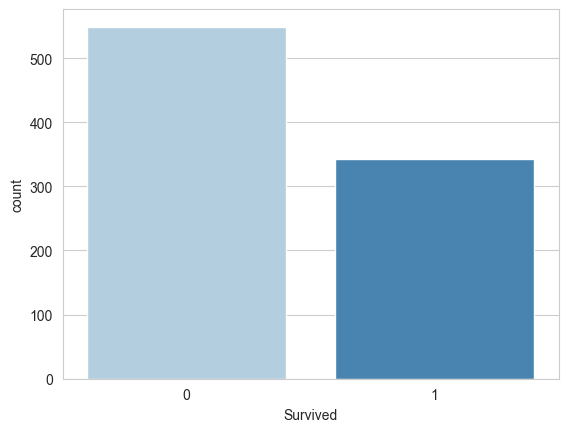

In [631]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', data=df,palette='Blues')

In [625]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

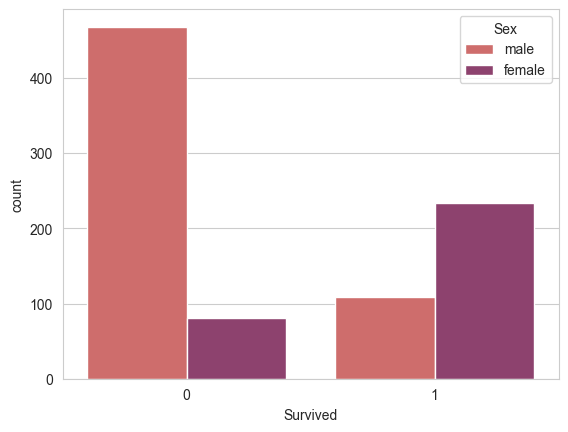

In [630]:
sns.set_style('whitegrid')
sns.countplot(x='Survived' , hue='Sex', data=df,palette='flare')

In [588]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

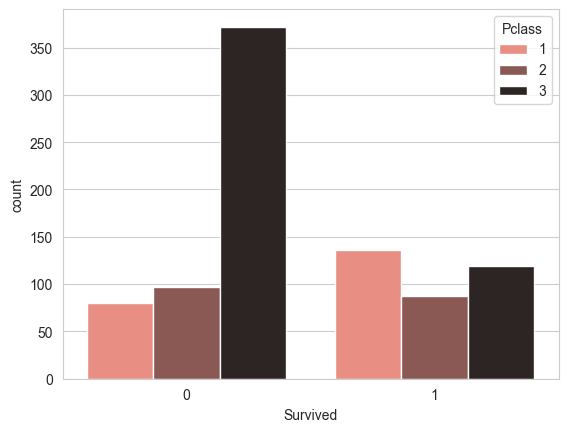

In [589]:
sns.set_style('whitegrid')
sns.countplot(x='Survived' , hue='Pclass', data=df,palette='dark:salmon_r')

<Axes: >

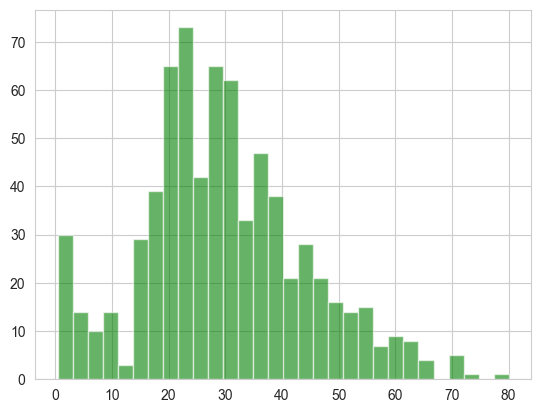

In [590]:
df['Age'].hist(bins=30, color='green' ,alpha=0.6)

<Axes: xlabel='SibSp', ylabel='count'>

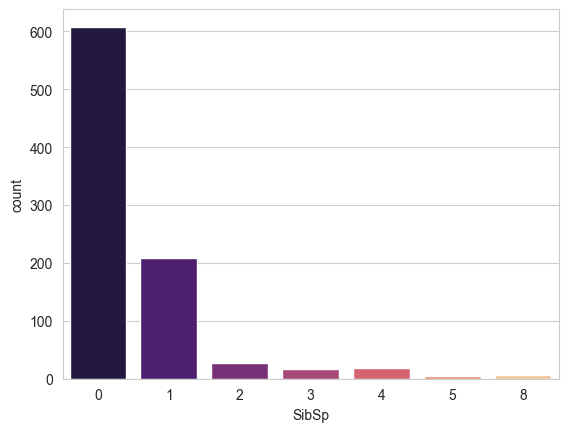

In [591]:
sns.countplot(x='SibSp', data = df,palette='magma')

<Axes: >

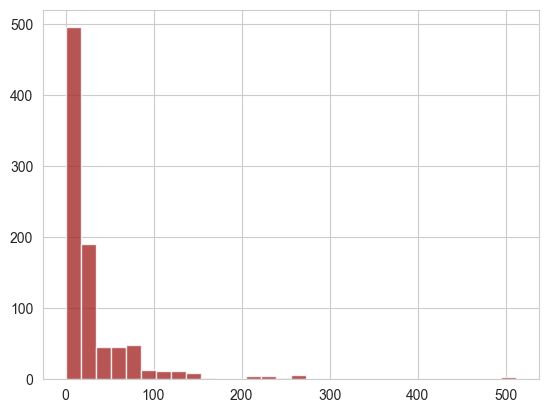

In [592]:
df['Fare'].hist(bins=30, color='brown' ,alpha=0.8)

In [593]:
# replacing null value with mean

In [594]:
df.Age.fillna(df.Age.mean(), inplace = True)

In [595]:
df['Age'].isnull().sum()

0

<Axes: >

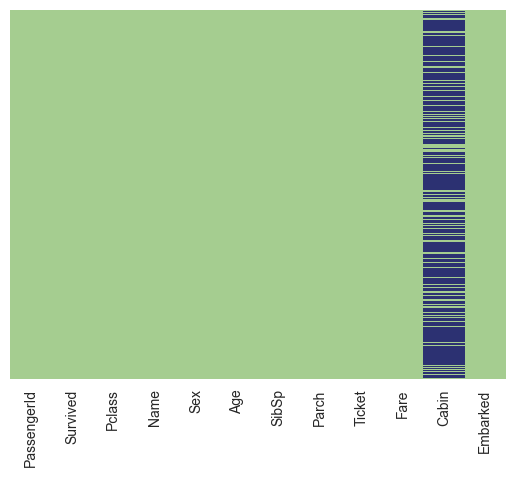

In [596]:
#checking Nan values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='crest')

embark = pd.get_dummies(df['Embarked'],drop_first=True)
embark = embark.astype(int)
s_dummy = pd.get_dummies(df['Sex'])
sex = s_dummy.astype(int)

In [598]:
df.drop(['Cabin','Ticket','Name','PassengerId','Embarked','Sex'], axis = 1, inplace = True)

<Axes: >

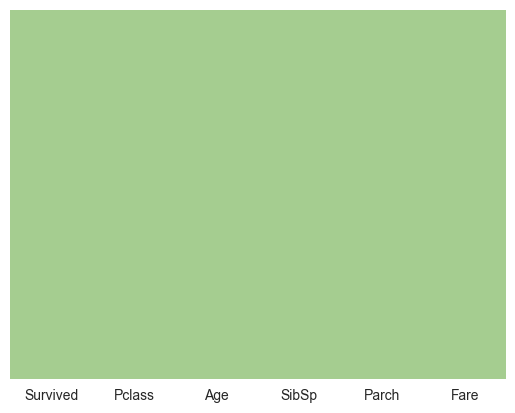

In [599]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='crest')

In [600]:
df = pd.concat([df,sex,embark], axis = 1)

In [601]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


### Splitting the data into Training and Testing sets

In [602]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

### Model Training using Logistic Regression

In [603]:
from sklearn.linear_model import LogisticRegression

In [604]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Bushra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [605]:
predictions = logmodel.predict(X_test)

In [606]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

### Evaluating the Model's accuracy

In [607]:
from sklearn.metrics import confusion_matrix

In [608]:
accuracy=confusion_matrix(y_test,predictions)

In [609]:
accuracy

array([[134,  20],
       [ 39,  75]], dtype=int64)

In [610]:
from sklearn.metrics import accuracy_score

In [611]:
accuracy=accuracy_score(y_test,predictions)
accuracy*100

77.98507462686567